
#**Image classification using CNNs**












**Description :**




Given different images of cars , we want to create a convolution neural network that can classify whether a car is damaged or not .
Dataset contains 1840 image labeled and was taken from kaggle . 

**TO DO :**

1.Exploratory data analysis.

2.Build your own CNN architecture to classify the images and evaluate it. 

3.Use Transfer learning to do the same task.


To get your API : go to Kaggle.com --> my account (top right click on the profile pic) --> scroll down to "create API token"




#**Importing data**

In [0]:
#upload your kaggle.json file 
!pip install kaggle
!mkdir /root/.kaggle

In [0]:
from google.colab import files
uploaded = files.upload() #upload the .json file to the colab

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json /root/.kaggle
#command to get data from kaggle 
!kaggle datasets download -d datacolab/car-damage-classification

 87% 84.0M/97.0M [00:01<00:00, 41.0MB/s]
100% 97.0M/97.0M [00:01<00:00, 61.0MB/s]


In [0]:
import os, cv2, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
import matplotlib.pyplot as plt 
from random import shuffle

In [0]:
!ls

car-damage-classification.zip  kaggle.json  sample_data


In [0]:
!unzip car-damage-classification.zip -d data

Archive:  car-damage-classification.zip
  inflating: data/car_damage_classification/00-damaged/0001.JPEG  
  inflating: data/car_damage_classification/00-damaged/0002.JPEG  
  inflating: data/car_damage_classification/00-damaged/0003.JPEG  
  inflating: data/car_damage_classification/00-damaged/0004.JPEG  
  inflating: data/car_damage_classification/00-damaged/0005.JPEG  
  inflating: data/car_damage_classification/00-damaged/0006.JPEG  
  inflating: data/car_damage_classification/00-damaged/0007.JPEG  
  inflating: data/car_damage_classification/00-damaged/0008.JPEG  
  inflating: data/car_damage_classification/00-damaged/0009.JPEG  
  inflating: data/car_damage_classification/00-damaged/0010.JPEG  
  inflating: data/car_damage_classification/00-damaged/0011.JPEG  
  inflating: data/car_damage_classification/00-damaged/0012.JPEG  
  inflating: data/car_damage_classification/00-damaged/0013.JPEG  
  inflating: data/car_damage_classification/00-damaged/0014.JPEG  
  inflating: data/car_

In [0]:

os.listdir('./data/car_damage_classification/')

['00-damaged', '01-not_damaged']

In [0]:
damaged_DIR='./data/car_damage_classification/00-damaged/'
undamaged_DIR='./data/car_damage_classification/01-not_damaged/'


damaged_cars = [damaged_DIR+i for i in os.listdir(damaged_DIR)] 
undamaged_cars = [undamaged_DIR+i for i in os.listdir(undamaged_DIR)] 


In [0]:
# Get the training subset 
def prepare_data_training(list1,list2):
    """
    Returns two arrays: 
        x is an array of images
        y is an array of labels
    """
    x = [] # images
    y = [] # labels
   
    for image in list1:
      
        imgs = cv2.imread(image)
        new_imgs = cv2.resize(imgs, dsize=(224,224))
        x.append(new_imgs)            
        y.append(0)
    for image in list2:
        imgs = cv2.imread(image)
        new_imgs = cv2.resize(imgs, dsize=(224,224))
        x.append(new_imgs)            
        y.append(1) 
       
    img_cnt = len(y)
    shuffle_idxes = list(range(img_cnt))
    shuffle(shuffle_idxes)
    shuffle_imgs = list()
    shuffle_labels = list()
    for idx in shuffle_idxes:
        shuffle_imgs.append(x[idx])
        shuffle_labels.append(y[idx])
    x = np.array(shuffle_imgs)
    y = np.array(shuffle_labels)
    x = x.reshape(-1,224,224,3)
    x = x/255.0
    
    return x, y

In [0]:
# Getting the training images and their labels
X, Y = prepare_data_training(damaged_cars,undamaged_cars)
print(X.shape)
print(Y.shape)

(1840, 224, 224, 3)
(1840,)


# **Exploratory data analysis**

car number 1 is not damaged
car number 2 is not damaged
car number 3 is not damaged
car number 4 is damaged
car number 5 is damaged
car number 6 is damaged


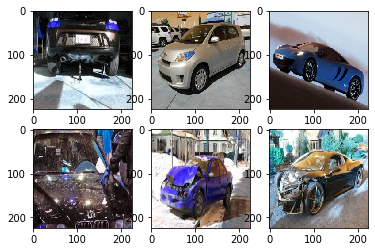

In [0]:
# Visualizing some images
figure,axe=plt.subplots(2,3)
k=1
for i in range(2):
    for j in range (3):
        l=random.randint(0,len(Y))
        axe[i,j].imshow(X[l])   
        if Y[l]==0:
          print ("car number "+str(k)+" is damaged")     
        else:
          print ("car number "+str(k)+" is not damaged")    
        k+=1

In [0]:
Class, Count = np.unique(Y, return_counts = True)

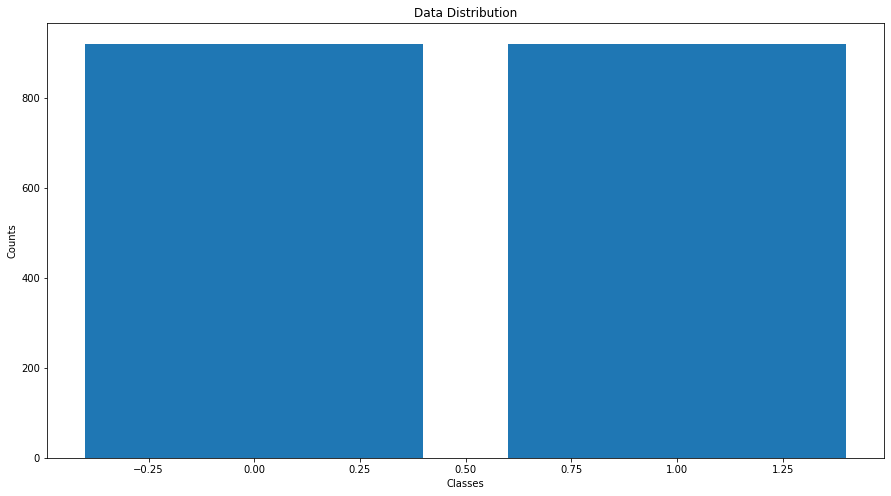

In [0]:
plt.figure(figsize=(15,8))
plt.bar(Class, Count)
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Data Distribution')

plt.show()

# **Your own CNN architecture**

In [0]:
y = to_categorical(Y)


In [0]:
y.shape

(1840, 2)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      36928     


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
hist = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1472 samples, validate on 368 samples
Epoch 1/10





1472/1472 [==============================] - 21s 14ms/step - loss: 0.8528 - acc: 0.5625 - val_loss: 0.6762 - val_acc: 0.6549
Epoch 2/10
1472/1472 [==============================] - 6s 4ms/step - loss: 0.6381 - acc: 0.6590 - val_loss: 0.6672 - val_acc: 0.6304
Epoch 3/10
1472/1472 [==============================] - 6s 4ms/step - loss: 0.5654 - acc: 0.7262 - val_loss: 0.5513 - val_acc: 0.7283
Epoch 4/10
1472/1472 [==============================] - 6s 4ms/step - loss: 0.5315 - acc: 0.7432 - val_loss: 0.5055 - val_acc: 0.7418
Epoch 5/10
1472/1472 [==============================] - 5s 4ms/step - loss: 0.4694 - acc: 0.7751 - val_loss: 0.4720 - val_acc: 0.7663
Epoch 6/10
1472/1472 [==============================] - 6s 4ms/step - loss: 0.4538 - acc: 0.7812 - val_loss: 0.4530 - val_acc: 0.7690
Epoch 7/10
1472/1472 [=======================

In [0]:
# Functions for visualizing the training parameters (loss and accuracy)
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))
    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')
    plt.legend()
    plt.title('Loss Function');
    
def accuracy_plot(fit_history):
    plt.figure(figsize=(18, 4))
    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')
    plt.legend()
    plt.title('Accuracy');

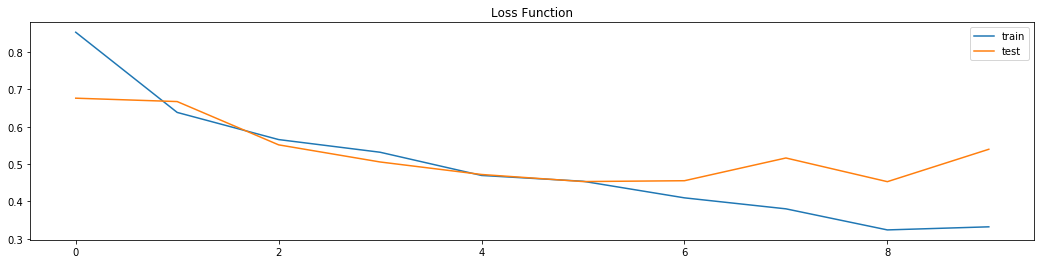

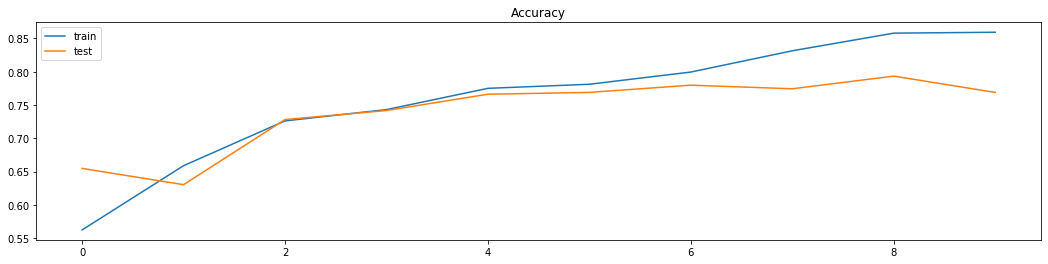

In [0]:
loss_plot(hist)
accuracy_plot(hist)

### Predefined Model

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.layers import GlobalAveragePooling2D,BatchNormalization
from keras.models import Model
import numpy as np

In [0]:
model = VGG16(classes=2,weights=None)

In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# initialize the optimizer and model
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [0]:
H = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Train on 1472 samples, validate on 368 samples
Epoch 1/10
1472/1472 [==============================] - 22s 15ms/step - loss: 7.8124 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 2/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 3/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 4/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 5/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 6/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
Epoch 7/10
1472/1472 [==============================] - 14s 10ms/step - loss: 7.9280 - acc: 0.5054 - val_loss: 8.3636 - val_acc: 0.4783
E

# **Transfer learning**

In [0]:
Vgg = VGG16(include_top=False,weights="imagenet")

58892288/58889256 [==============================] - 3s 0us/step


In [0]:

x = Vgg.output  
x = GlobalAveragePooling2D()(x)  
x = BatchNormalization()(x)  
x = Dropout(0.5)(x)  
x = Dense(512, activation ='relu')(x) 
x = BatchNormalization()(x) 
x = Dropout(0.5)(x) 
  
x = Dense(2, activation ='softmax')(x)  
  
model = Model(Vgg.input, x)  
  
model.compile(optimizer ='Adam',  loss ='categorical_crossentropy',  metrics =['accuracy'])  
  
model.summary()  

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
TRANSH = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2)

Train on 1472 samples, validate on 368 samples
Epoch 1/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4697 - acc: 0.7812 - val_loss: 8.1935 - val_acc: 0.4783
Epoch 2/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4525 - acc: 0.7874 - val_loss: 0.6436 - val_acc: 0.7446
Epoch 3/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4768 - acc: 0.7758 - val_loss: 1.9678 - val_acc: 0.5299
Epoch 4/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4579 - acc: 0.7860 - val_loss: 7.7087 - val_acc: 0.5217
Epoch 5/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4263 - acc: 0.8050 - val_loss: 4.9684 - val_acc: 0.4810
Epoch 6/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4022 - acc: 0.8281 - val_loss: 8.4066 - val_acc: 0.4783
Epoch 7/20
1472/1472 [==============================] - 13s 9ms/step - loss: 0.4037 - acc: 0.8227 - val_loss: 3.2879 - val_acc: 0.5245
Epoch 8/

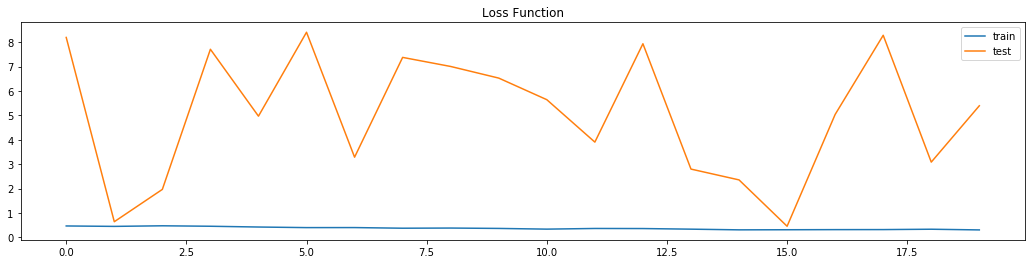

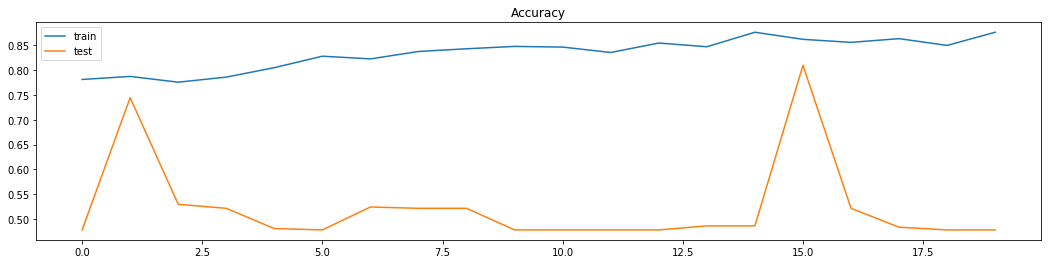

In [0]:
loss_plot(TRANSH)
accuracy_plot(TRANSH)